## Goal fo the project
- To visualize high dimensional data in 2D space using tSNE - completed
- To understand the limitations of tSNE - todo
- Explore the importance of perplexity - todo

INFO:root:Checking if the file is already downloaded...
INFO:root:File already downloaded.
INFO:root:Converting GloVe format to Word2Vec format...
/var/folders/z0/rj2w3r8n0cq_wv77rh08zynh0000gn/T/ipykernel_2381/3963057619.py:37: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)
INFO:gensim.models.keyedvectors:loading projection weights from /Users/saip/My Drive/machine-learning-fundamentals/datasets/glove.6B.50d.txt
INFO:gensim.utils:KeyedVectors lifecycle event {'msg': 'loaded (400000, 50) matrix of type float32 from /Users/saip/My Drive/machine-learning-fundamentals/datasets/glove.6B.50d.txt', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-11-29T21:40:41.288518', 'gensim': '4.3.2', 'python': '3.9.6 (default, Aug 11 2023, 19:44:49) \n[Clang 15.0.0 (clang-1500.0.40.1)]', 'platform': 'macOS-14.1-arm64-arm-64bit', 'event':

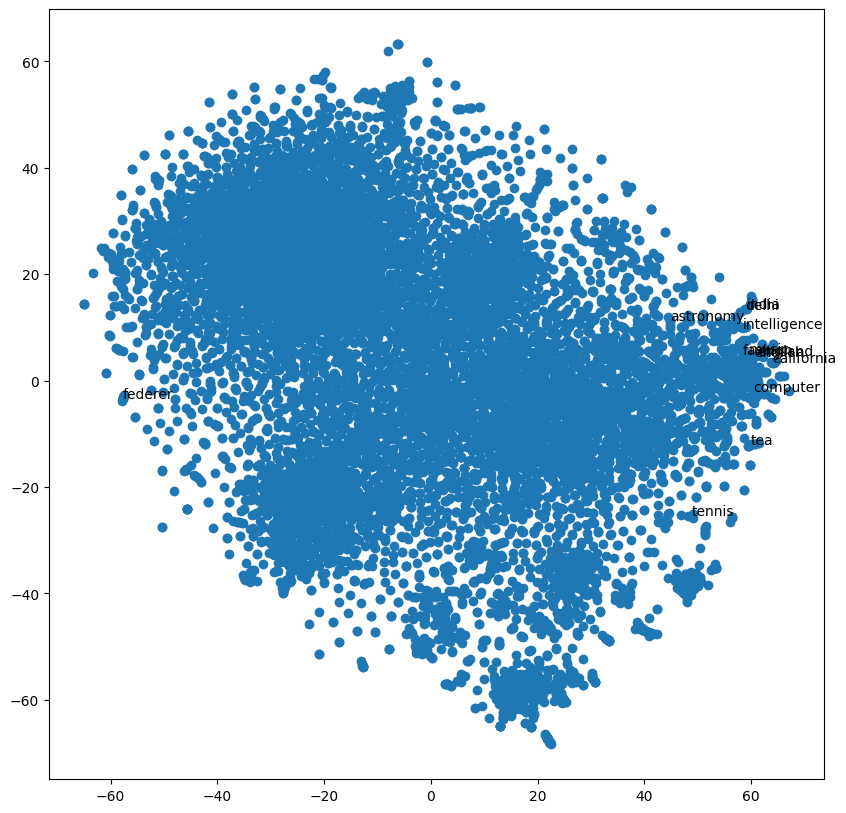

INFO:root:Plotting completed.


In [6]:
import urllib.request
import numpy as np
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)

# download the GloVe model only if it is not already downloaded

# check if the file is already downloaded
logging.info("Checking if the file is already downloaded...")
folder_path = '/Users/saip/My Drive/machine-learning-fundamentals/datasets'
try:
    with open(f'{folder_path}/glove.6B.50d.txt', 'r') as f:
        logging.info("File already downloaded.")
except FileNotFoundError:
    logging.info("Starting download of GloVe model...")
    # Download the GloVe model
    url = 'http://nlp.stanford.edu/data/glove.6B.zip'
    filename = '{}/glove.6B.zip'.format(folder_path)
    urllib.request.urlretrieve(url, filename)
    logging.info("Download completed.")

    logging.info("Starting to unzip the file...")
    # Unzip the file (may take a few minutes)
    !unzip -q glove.6B.zip -d {folder_path}
    logging.info("Unzipping completed.")

logging.info("Converting GloVe format to Word2Vec format...")
# Convert GloVe format to Word2Vec format
glove_input_file = f'{folder_path}/glove.6B.50d.txt'
word2vec_output_file = f'{folder_path}/glove.6B.50d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)
logging.info("Conversion completed.")

logging.info("Loading the GloVe model into memory...")
# Load the GloVe model into memory
model = KeyedVectors.load_word2vec_format(f'{folder_path}/glove.6B.50d.txt.word2vec', binary=False)
logging.info("Model loaded.")

words_to_show = ['delhi','english','tea','india','england','federer','tennis','intelligence','computer','california','fashion','music','astronomy']

logging.info("Selecting a random sample of 10000 words...")
# Select a random sample of 1000 words
words = np.random.choice(list(model.key_to_index), size=10000)
words = np.concatenate((words, words_to_show))
logging.info("Words selected.")

logging.info("Getting the vectors for these words...")
# Get the vectors for these words
vectors = np.array([model[word] for word in words])
logging.info("Vectors obtained.")

logging.info("Applying t-SNE...")
# Apply t-SNE
tsne = TSNE(n_components=2)
vectors_tsne = tsne.fit_transform(vectors)
logging.info("t-SNE applied.")

logging.info("Plotting the result...")
# Plot the result
plt.figure(figsize=(10, 10))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])

# Annotate the words on the plot
for word in words_to_show:
    plt.annotate(word, (vectors_tsne[words == word][0, 0], vectors_tsne[words == word][0, 1]))
plt.show()


logging.info("Plotting completed.")